In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
GOLD = pd.read_csv('GOLD.csv')
GOLD

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-05,15.470000,15.820000,15.320000,15.430000,12.977592,16348300
1,2013-12-06,15.490000,15.680000,15.350000,15.400000,12.952355,13779400
2,2013-12-09,15.630000,16.160000,15.610000,16.000000,13.456996,17704600
3,2013-12-10,16.549999,17.000000,16.510000,16.870001,14.188725,21759600
4,2013-12-11,16.850000,16.879999,16.320000,16.379999,13.776601,15990000
...,...,...,...,...,...,...,...
2511,2023-11-28,16.670000,17.469999,16.600000,17.440001,17.340000,32256300
2512,2023-11-29,17.309999,17.500000,17.230000,17.389999,17.389999,17301000
2513,2023-11-30,17.299999,17.610001,17.250000,17.590000,17.590000,19571700
2514,2023-12-01,17.559999,17.790001,17.510000,17.730000,17.730000,22998200


In [3]:
df = GOLD.copy()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-05,15.470000,15.820000,15.320000,15.430000,12.977592,16348300
1,2013-12-06,15.490000,15.680000,15.350000,15.400000,12.952355,13779400
2,2013-12-09,15.630000,16.160000,15.610000,16.000000,13.456996,17704600
3,2013-12-10,16.549999,17.000000,16.510000,16.870001,14.188725,21759600
4,2013-12-11,16.850000,16.879999,16.320000,16.379999,13.776601,15990000
...,...,...,...,...,...,...,...
2511,2023-11-28,16.670000,17.469999,16.600000,17.440001,17.340000,32256300
2512,2023-11-29,17.309999,17.500000,17.230000,17.389999,17.389999,17301000
2513,2023-11-30,17.299999,17.610001,17.250000,17.590000,17.590000,19571700
2514,2023-12-01,17.559999,17.790001,17.510000,17.730000,17.730000,22998200


In [4]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Date'] = df['Date'].dt.tz_convert(None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.7 KB


In [5]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day']=df[ "Date"].dt.day

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2013-12-05,15.470000,15.820000,15.320000,15.430000,12.977592,16348300,2013,12,5
1,2013-12-06,15.490000,15.680000,15.350000,15.400000,12.952355,13779400,2013,12,6
2,2013-12-09,15.630000,16.160000,15.610000,16.000000,13.456996,17704600,2013,12,9
3,2013-12-10,16.549999,17.000000,16.510000,16.870001,14.188725,21759600,2013,12,10
4,2013-12-11,16.850000,16.879999,16.320000,16.379999,13.776601,15990000,2013,12,11
...,...,...,...,...,...,...,...,...,...,...
2511,2023-11-28,16.670000,17.469999,16.600000,17.440001,17.340000,32256300,2023,11,28
2512,2023-11-29,17.309999,17.500000,17.230000,17.389999,17.389999,17301000,2023,11,29
2513,2023-11-30,17.299999,17.610001,17.250000,17.590000,17.590000,19571700,2023,11,30
2514,2023-12-01,17.559999,17.790001,17.510000,17.730000,17.730000,22998200,2023,12,1


In [7]:
train_size = round(len(df)*0.8)

train = df[0:train_size][['Date','Close']]
test = df[train_size:][['Date','Close']]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2013 non-null   datetime64[ns]
 1   Close   2013 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.6 KB


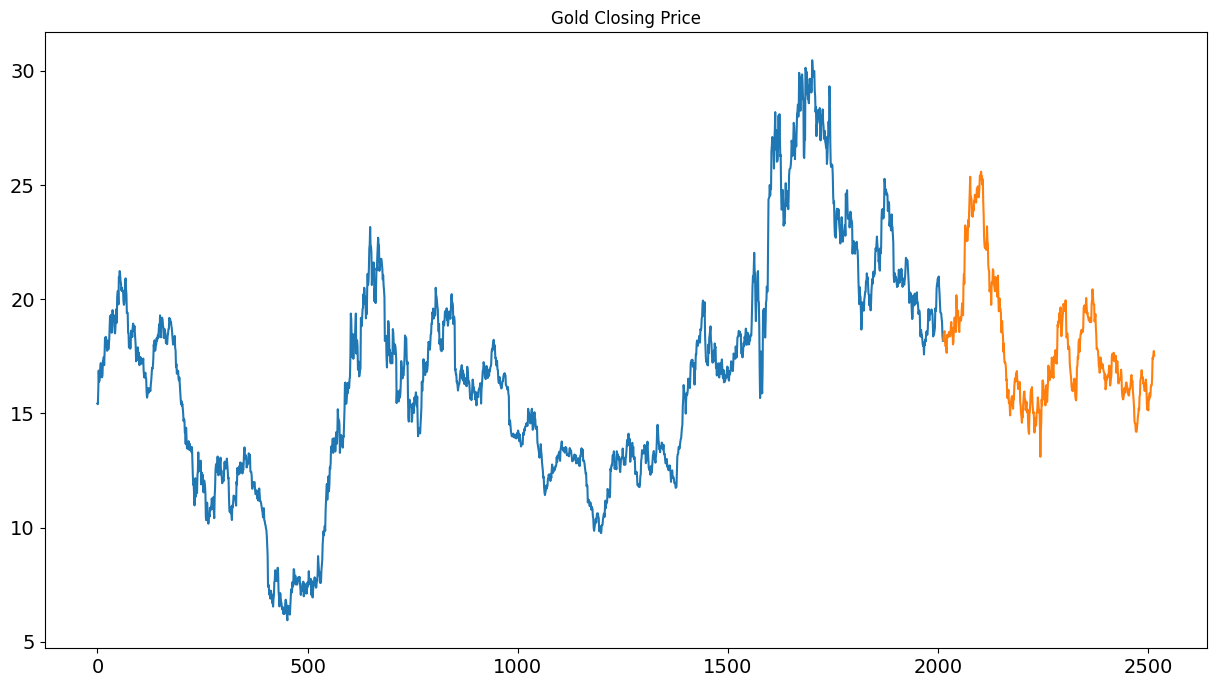

In [8]:
train['Date'] = pd.DatetimeIndex(train['Date']).date
test['Date'] = pd.DatetimeIndex(test['Date']).date

#df1['price'].plot(figsize=(15,8), title= 'Harga Emas ANTAM', fontsize=14)
train['Close'].plot(figsize=(15,8), title= 'Gold Closing Price', fontsize=14)
test['Close'].plot(figsize=(15,8), title= 'Gold Closing Price', fontsize=14)

plt.show()